In [62]:
import pandas as pd
import seaborn as sns

In [49]:
#read in all 5 nyc files
nyc_2015 = pd.read_csv('../data/nyc2015.csv')
nyc_2016 = pd.read_csv('../data/nyc2016.csv')
nyc_2017 = pd.read_csv('../data/nyc2017.csv')
nyc_2018 = pd.read_csv('../data/nyc2018.csv')
nyc_2019 = pd.read_csv('../data/nyc2019.csv')

In [50]:
#add year column to each race
nyc_2015['year'] = '2015'
nyc_2016['year'] = '2016'
nyc_2017['year'] = '2017'
nyc_2018['year'] = '2018'
nyc_2019['year'] = '2019'

In [52]:
#confirming first 10k per year
print(nyc_2015.shape)
print(nyc_2016.shape)
print(nyc_2017.shape)
print(nyc_2018.shape)
print(nyc_2019.shape)

(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)


In [53]:
#understanding fields in data
nyc_2016.loc[3034]

Unnamed: 0                        3034
runnerId                      19788849
firstName                       Nicole
lastName                     Muldowney
bib                               6244
age                                 26
birthdate          1990-06-13T00:00:00
gender                               F
city                        Birmingham
countryCode                        USA
stateProvince                       AL
iaaf                               USA
overallPlace                      3035
overallTime                    3:22:04
pace                             07:43
genderPlace                        377
ageGradeTime                     22:04
ageGradePlace                      923
ageGradePercent                  67.02
racesCount                           2
year                              2016
Name: 3034, dtype: object

In [135]:
#concat all race files
nyc_races = pd.concat([nyc_2015, nyc_2016,nyc_2017,nyc_2018,nyc_2019], axis=0)

In [136]:
nyc_races.head()

,Unnamed: 0,runnerId,firstName,lastName,bib,age,birthdate,gender,city,countryCode,...,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
0,0,16619869,Stanley,Biwott,5,29,1986-04-21T00:00:00,M,Eldoret,KEN,...,KEN,1,2:10:34,04:59,1,10:34,2,94.18,2,2015
1,1,16654079,Geoffery,Kamworor,6,22,1992-11-22T00:00:00,M,Kapchorwa District,KEN,...,KEN,2,2:10:48,05:00,2,10:48,3,94.00,4,2015
2,2,16611443,Lelisa,Desisa,2,25,1990-01-14T00:00:00,M,Addis Ababa,ETH,...,ETH,3,2:12:10,05:03,3,12:10,4,93.03,5,2015
3,3,16616462,Wilson,Kipsang,1,33,1982-03-15T00:00:00,M,Iten,KEN,...,KEN,4,2:12:45,05:04,4,12:36,5,92.73,5,2015
4,4,16654080,Yemane,Tsegay,7,30,1985-04-08T00:00:00,M,Addis Ababa,ETH,...,ETH,5,2:13:24,05:06,5,13:24,6,92.18,1,2015


In [137]:
#remove/drop columns that are not needed: Unnamed: 0 for now (Maybe later: ageGradeTime, ageGradePlace, ageGradePercent,racesCount) 
nyc_races = nyc_races.drop(columns = ['Unnamed: 0','bib'], axis=1)
nyc_races.columns

Index(['runnerId', 'firstName', 'lastName', 'age', 'birthdate', 'gender',
       'city', 'countryCode', 'stateProvince', 'iaaf', 'overallPlace',
       'overallTime', 'pace', 'genderPlace', 'ageGradeTime', 'ageGradePlace',
       'ageGradePercent', 'racesCount', 'year'],
      dtype='object')

In [139]:
nyc_races.loc[nyc_races['runnerId'] == 19788849]

,runnerId,firstName,lastName,age,birthdate,gender,city,countryCode,stateProvince,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
3034,19788849,Nicole,Muldowney,26,1990-06-13T00:00:00,F,Birmingham,USA,AL,USA,3035,3:22:04,07:43,377,22:04,923,67.02,2,2016


Rename columns for readability and shorten names, combine first and last name to 'full_name'


In [140]:
nyc_races['full_name'] = nyc_races['firstName'] + ' ' + nyc_races['lastName']
nyc_races = nyc_races.rename(columns={'runnerId': 'id', 'birthdate': 'dob','countryCode': 'country',
                                      'stateProvince': 'state',
                                     'overallPlace': 'place','overallTime': 'time',
                                     'genderPlace': 'gender_place',
                                     'ageGradeTime': 'age_grade_time',
                                      'ageGradePlace': 'age_grade_place',
                                      'ageGradePercent': 'age_grade_percent',
                                      'racesCount': 'nyrr_races'})

Add full name and year columns to left positions, drop first and last name columns

In [141]:
nyc_races.insert(1, 'full_name', nyc_races.pop('full_name'))
nyc_races.insert(2,'year',nyc_races.pop('year'))
nyc_races = nyc_races.drop(columns = ['firstName','lastName'],axis=1)

create age bins/buckets

In [164]:
nyc_races['age_group'] = pd.cut(x=nyc_races['age'],
                          bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], 
                          labels=['10-19','20-29', '30-39', '40-49','50-59','60-69','70-79','80-89'])


In [142]:
nyc_races.head()

,id,full_name,year,age,dob,gender,city,country,state,iaaf,place,time,pace,gender_place,age_grade_time,age_grade_place,age_grade_percent,nyrr_races
0,16619869,Stanley Biwott,2015,29,1986-04-21T00:00:00,M,Eldoret,KEN,NaN,KEN,1,2:10:34,04:59,1,10:34,2,94.18,2
1,16654079,Geoffery Kamworor,2015,22,1992-11-22T00:00:00,M,Kapchorwa District,KEN,NaN,KEN,2,2:10:48,05:00,2,10:48,3,94.00,4
2,16611443,Lelisa Desisa,2015,25,1990-01-14T00:00:00,M,Addis Ababa,ETH,NaN,ETH,3,2:12:10,05:03,3,12:10,4,93.03,5
3,16616462,Wilson Kipsang,2015,33,1982-03-15T00:00:00,M,Iten,KEN,NaN,KEN,4,2:12:45,05:04,4,12:36,5,92.73,5
4,16654080,Yemane Tsegay,2015,30,1985-04-08T00:00:00,M,Addis Ababa,ETH,NaN,ETH,5,2:13:24,05:06,5,13:24,6,92.18,1


In [143]:
nyc_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   full_name          50000 non-null  object 
 2   year               50000 non-null  object 
 3   age                50000 non-null  int64  
 4   dob                49999 non-null  object 
 5   gender             50000 non-null  object 
 6   city               49989 non-null  object 
 7   country            50000 non-null  object 
 8   state              27040 non-null  object 
 9   iaaf               49999 non-null  object 
 10  place              50000 non-null  int64  
 11  time               50000 non-null  object 
 12  pace               50000 non-null  object 
 13  gender_place       50000 non-null  int64  
 14  age_grade_time     50000 non-null  object 
 15  age_grade_place    50000 non-null  int64  
 16  age_grade_percent  5000

Change time to timedelta from object, remove dob time portion

In [145]:
nyc_races['time'] = pd.to_timedelta(nyc_races['time'])
nyc_races['dob'] = nyc_races['dob'].str.rstrip('T00:00:00')

In [64]:
nyc_races.to_csv('../data/clean_nyc.csv')

In [144]:
nyc_races['country'].value_counts()

USA    27049
ITA     2797
FRA     2488
GBR     2044
ESP     1580
       ...  
TZA        1
KHM        1
VCT        1
EGY        1
TGO        1
Name: country, Length: 135, dtype: int64

In [146]:
#fill null state rows? and 1 null city row?  & remove iaaf column?

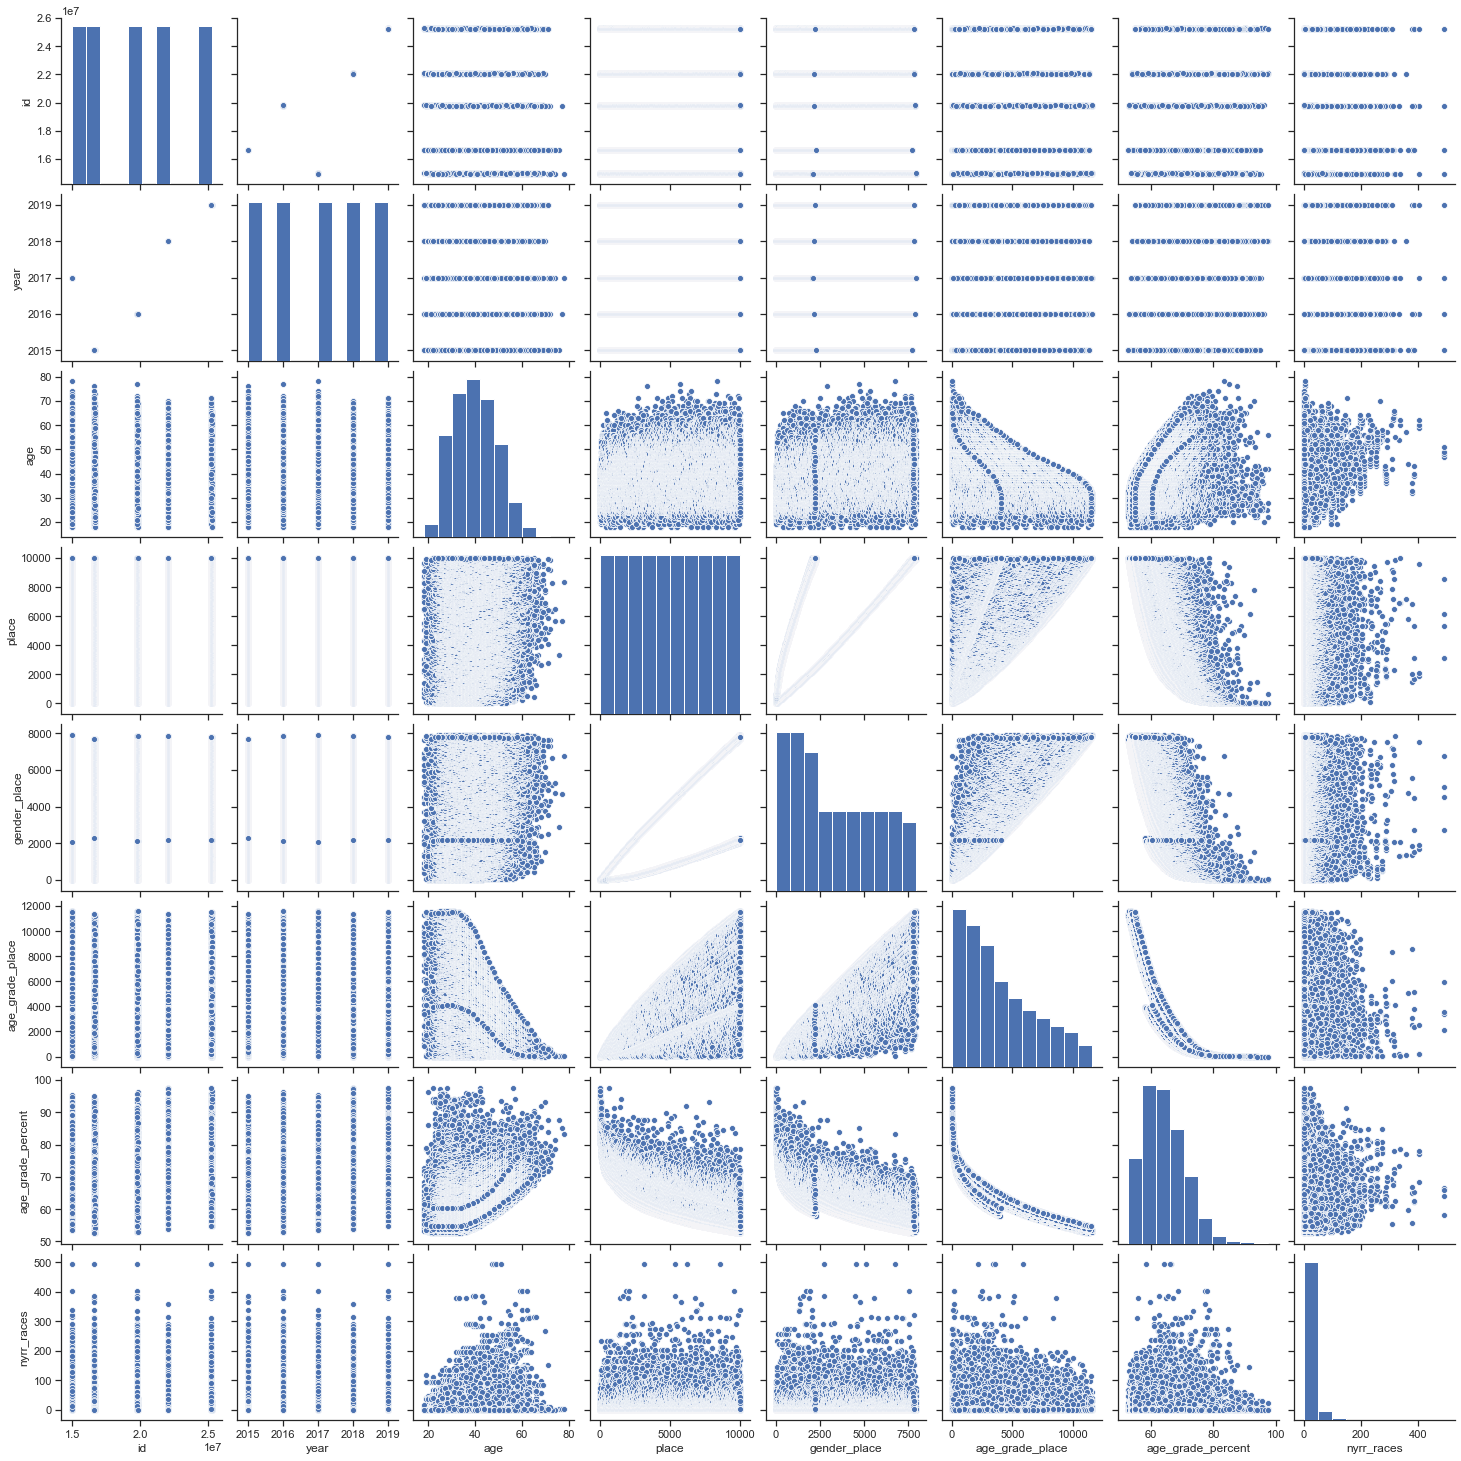

In [131]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(nyc_races)

# Age Grading eda
https://www.runnersworld.com/advanced/a20794116/a-guide-to-age-grading/

In [138]:
nyc_races['age_grade_percent'].describe()

count    50000.000000
mean        64.228865
std          6.600073
min         52.590000
25%         59.270000
50%         63.370000
75%         68.500000
max         97.600000
Name: ageGradePercent, dtype: float64

In [ ]:
#group by gender and age group for analysis across years